In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
from datetime import datetime, timedelta, date
import operator
import matplotlib.pyplot as plt
from collections import namedtuple
%matplotlib notebook

In [15]:
events = pd.read_csv('data/rain_events_ohare.csv')
events = events[(events['duration_hrs'] > 1) | (events['total_precip'] > 0.08)]
events['start_time'] = pd.to_datetime(events['start_time'])
events['end_time'] = pd.to_datetime(events['end_time'])
events.head()

,start_time,end_time,duration_hrs,total_precip
0,1970-03-19 18:00:00,1970-03-19 22:00:00,4.0,0.18
1,1970-03-25 21:00:00,1970-03-26 07:00:00,10.0,0.27
2,1970-04-13 03:00:00,1970-04-13 04:00:00,1.0,0.24
4,1970-04-19 03:00:00,1970-04-19 10:00:00,7.0,0.29
5,1970-04-30 00:00:00,1970-05-01 01:00:00,25.0,0.53


In [16]:
events = events.set_index('start_time')
events['start_time'] = events.index.values
events['avg_intensity'] = events['total_precip'] / events['duration_hrs']
def find_year(timestamp):
    return timestamp.year
events['year'] = events['start_time'].apply(find_year)
events.head()

,end_time,duration_hrs,total_precip,start_time,avg_intensity,year
start_time,,,,,,
1970-03-19 18:00:00,1970-03-19 22:00:00,4.0,0.18,1970-03-19 18:00:00,0.045000,1970
1970-03-25 21:00:00,1970-03-26 07:00:00,10.0,0.27,1970-03-25 21:00:00,0.027000,1970
1970-04-13 03:00:00,1970-04-13 04:00:00,1.0,0.24,1970-04-13 03:00:00,0.240000,1970
1970-04-19 03:00:00,1970-04-19 10:00:00,7.0,0.29,1970-04-19 03:00:00,0.041429,1970
1970-04-30 00:00:00,1970-05-01 01:00:00,25.0,0.53,1970-04-30 00:00:00,0.021200,1970


<IPython.core.display.Javascript object>


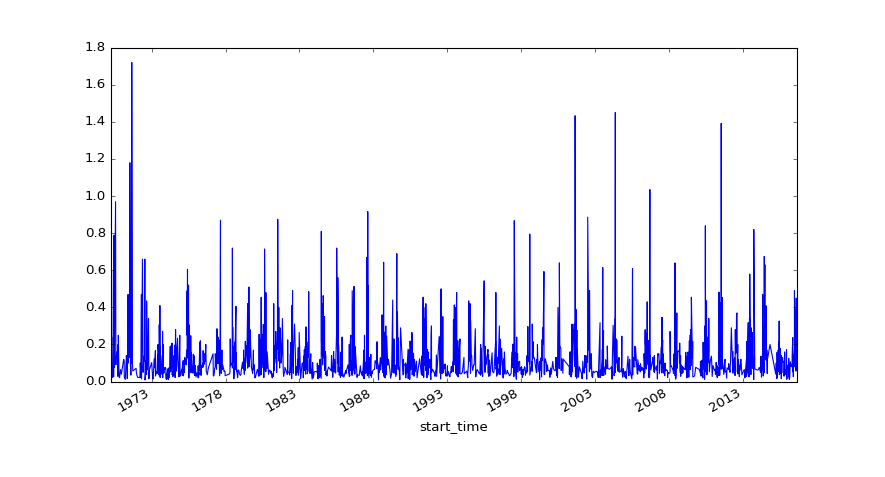

In [17]:
events['avg_intensity'].plot()

<IPython.core.display.Javascript object>


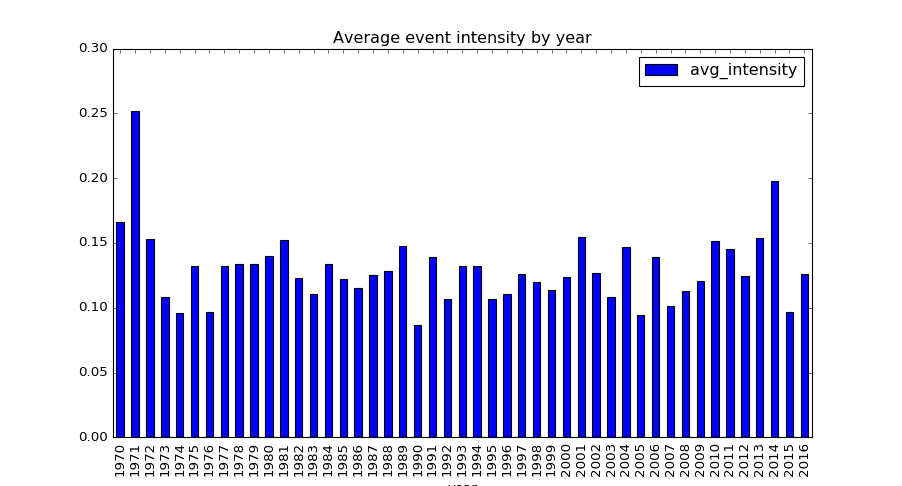

In [26]:
events[['year', 'avg_intensity']].groupby('year').mean().plot(kind='bar', title='Average event intensity by year')

<IPython.core.display.Javascript object>


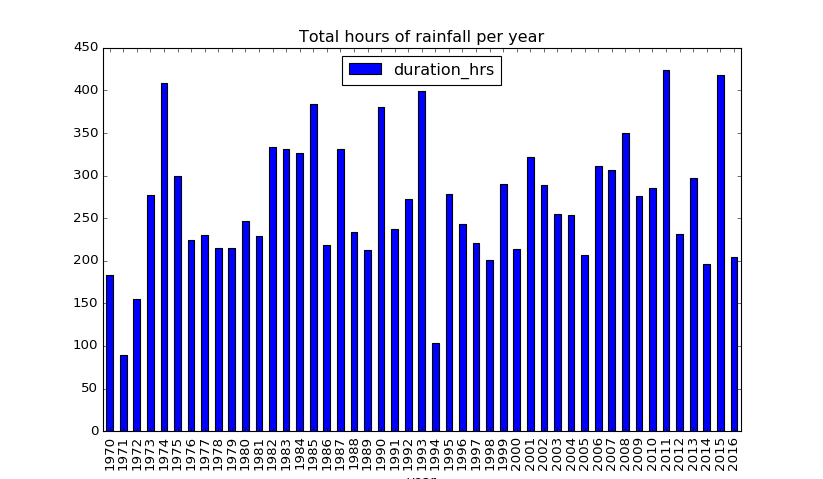

In [44]:
events[['year', 'duration_hrs']].groupby('year').sum().plot(kind='bar', title='Total hours of rainfall per year')

<IPython.core.display.Javascript object>


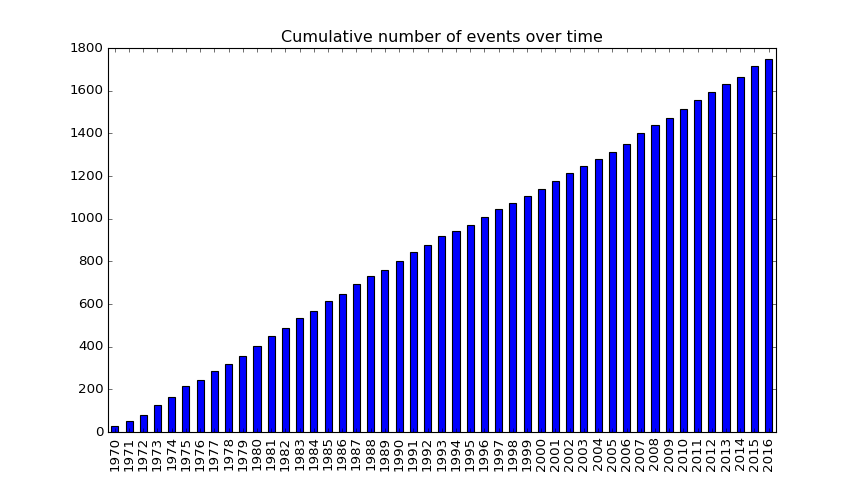

In [48]:
events['year'].value_counts().sort_index().cumsum().plot(kind='bar', title='Cumulative number of events over time')

#### The number of events over the years isn't really changing, pretty constant overall.

#### The Chicago Climate Action Plan expects less frequent summer rains, so let's test that out.

In [49]:
# Get the season of each event based on the start date
# This code is copied from http://stackoverflow.com/questions/16139306/determine-season-given-timestamp-in-python-using-datetime

Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('spring', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('summer', (date(Y,  6, 21),  date(Y,  9, 22))),
           ('autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
           ('winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(timestamp):
    if isinstance(timestamp, datetime):
        timestamp = timestamp.date()
    timestamp = timestamp.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= timestamp <= end)

events['season'] = events['start_time'].apply(get_season)
events.head()

,end_time,duration_hrs,total_precip,start_time,avg_intensity,year,season
start_time,,,,,,,
1970-03-19 18:00:00,1970-03-19 22:00:00,4.0,0.18,1970-03-19 18:00:00,0.045000,1970,winter
1970-03-25 21:00:00,1970-03-26 07:00:00,10.0,0.27,1970-03-25 21:00:00,0.027000,1970,spring
1970-04-13 03:00:00,1970-04-13 04:00:00,1.0,0.24,1970-04-13 03:00:00,0.240000,1970,spring
1970-04-19 03:00:00,1970-04-19 10:00:00,7.0,0.29,1970-04-19 03:00:00,0.041429,1970,spring
1970-04-30 00:00:00,1970-05-01 01:00:00,25.0,0.53,1970-04-30 00:00:00,0.021200,1970,spring


In [50]:
summer_events = events[events['season'] == 'summer']
summer_events.head()

,end_time,duration_hrs,total_precip,start_time,avg_intensity,year,season
start_time,,,,,,,
1970-07-19 15:00:00,1970-07-19 16:00:00,1.0,0.97,1970-07-19 15:00:00,0.97,1970,summer
1970-07-27 15:00:00,1970-07-27 16:00:00,1.0,0.09,1970-07-27 15:00:00,0.09,1970,summer
1970-07-28 18:00:00,1970-07-28 19:00:00,1.0,0.15,1970-07-28 18:00:00,0.15,1970,summer
1970-07-30 00:00:00,1970-07-30 07:00:00,7.0,0.84,1970-07-30 00:00:00,0.12,1970,summer
1970-08-03 00:00:00,1970-08-03 01:00:00,1.0,0.13,1970-08-03 00:00:00,0.13,1970,summer


<IPython.core.display.Javascript object>


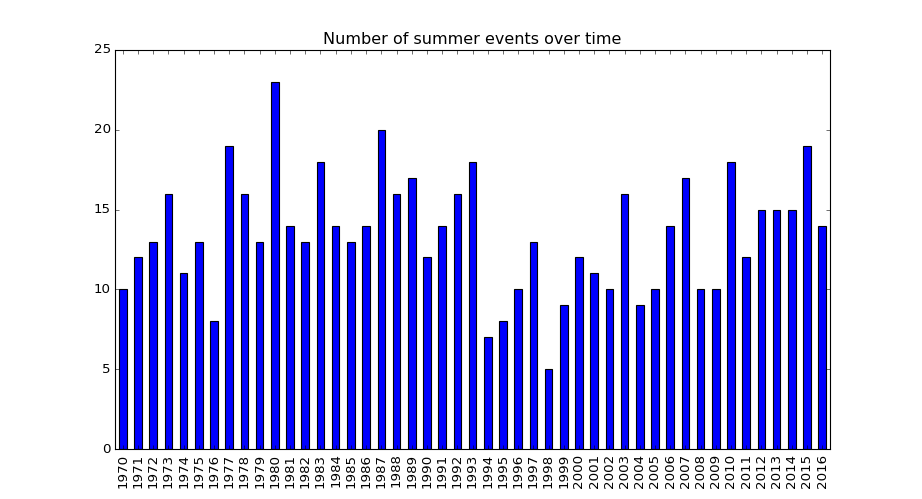

In [52]:
summer_events['year'].value_counts().sort_index().plot(kind='bar', title='Number of summer events over time')

In [53]:
# TODO: Left off here

In [7]:
# Let's take a look at summer showers.  Are they happening with less frequencly over the years?
summer_events = events[events['season'] == 'summer']
summer_events.head()

,start_time,end_time,duration_hrs,total_precip,season,avg_intensity,year
15,1970-07-19 15:00:00,1970-07-19 16:00:00,1.0,0.97,summer,0.97,1970
16,1970-07-27 15:00:00,1970-07-27 16:00:00,1.0,0.09,summer,0.09,1970
17,1970-07-28 18:00:00,1970-07-28 19:00:00,1.0,0.15,summer,0.15,1970
18,1970-07-30 00:00:00,1970-07-30 07:00:00,7.0,0.84,summer,0.12,1970
19,1970-08-03 00:00:00,1970-08-03 01:00:00,1.0,0.13,summer,0.13,1970


<IPython.core.display.Javascript object>


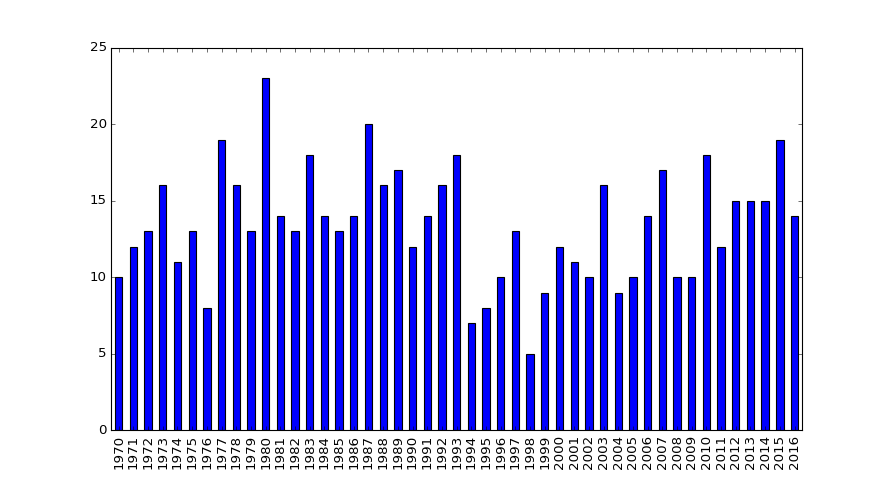

In [8]:
(summer_events['year'].value_counts().sort_index()).plot(kind='bar')

In [9]:
# No!

<IPython.core.display.Javascript object>


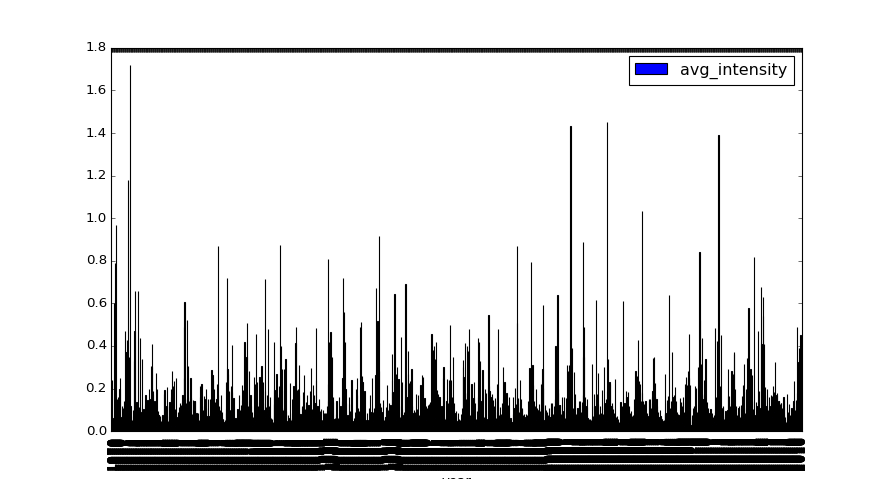

In [24]:
events.plot()

In [17]:
summer_events[['year', 'avg_intensity']].groupby('year').mean()

,avg_intensity
year,
1970,0.205799
1971,0.397500
1972,0.144155
1973,0.142399
1974,0.128182
1975,0.161194
1976,0.128193
1977,0.162803
1978,0.160575


<IPython.core.display.Javascript object>


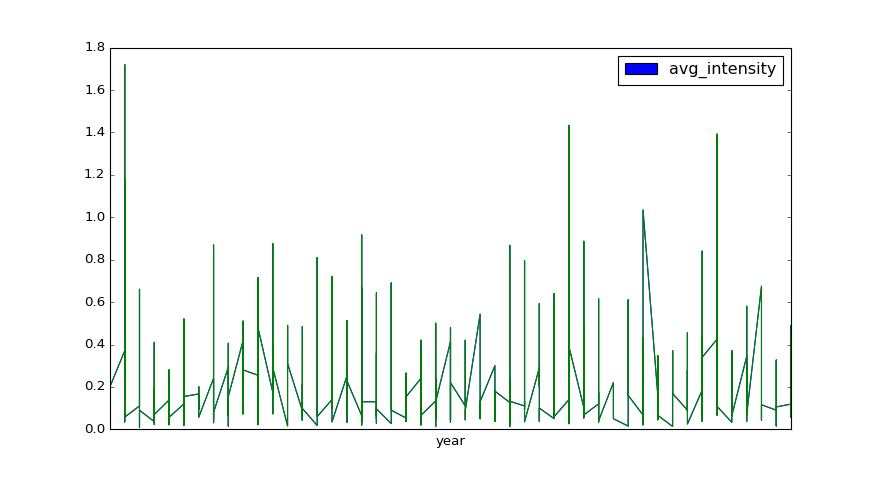

In [16]:
summer_events[['year', 'avg_intensity']].groupby('year').mean().plot(kind='bar')

In [35]:
summer_events['hours_between_events'] = (summer_events['start_time'] - summer_events['end_time'].shift()).astype('timedelta64[h]')
summer_events.head()

d:\data_science_projects\chicagorain\virtualenvs\nyear-venv\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,start_time,end_time,duration_hrs,total_precip,season,intensity,avg_intensity,year,hours_between_events
15,1970-07-19 15:00:00,1970-07-19 16:00:00,1.0,0.97,summer,0.97,0.97,1970,NaN
16,1970-07-27 15:00:00,1970-07-27 16:00:00,1.0,0.09,summer,0.09,0.09,1970,191.0
17,1970-07-28 18:00:00,1970-07-28 19:00:00,1.0,0.15,summer,0.15,0.15,1970,26.0
18,1970-07-30 00:00:00,1970-07-30 07:00:00,7.0,0.84,summer,0.12,0.12,1970,29.0
19,1970-08-03 00:00:00,1970-08-03 01:00:00,1.0,0.13,summer,0.13,0.13,1970,89.0


<IPython.core.display.Javascript object>


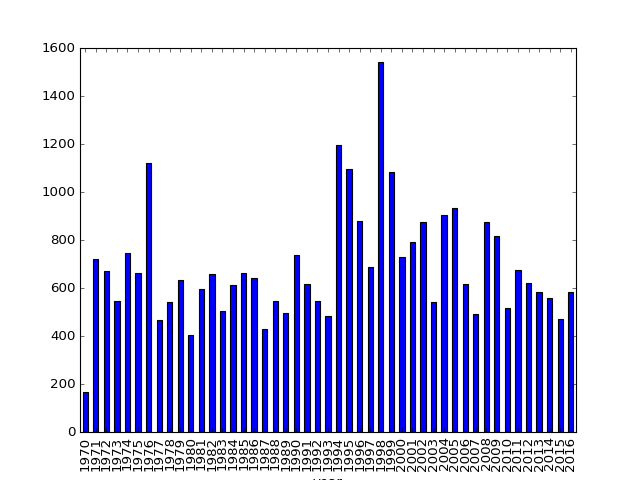

In [39]:
# Average time between events - in hours
(summer_events.groupby('year')['hours_between_events'].mean()).plot(kind='bar')

In [54]:
# Events per season per year
per_season = {year: {'winter': 0, 'spring': 0, 'autumn': 0, 'summer': 0} for year in range(1970,2017)}
for index, event in events.iterrows():
    per_season[event['year']][event['season']] += 1
events_per_season_by_year = pd.DataFrame(per_season)
events_per_season_by_year = events_per_season_by_year.transpose()
events_per_season_by_year.head()

,autumn,spring,summer,winter
1970,6,10,10,1
1971,2,7,12,5
1972,4,9,13,3
1973,10,11,16,6
1974,8,14,11,8


<IPython.core.display.Javascript object>


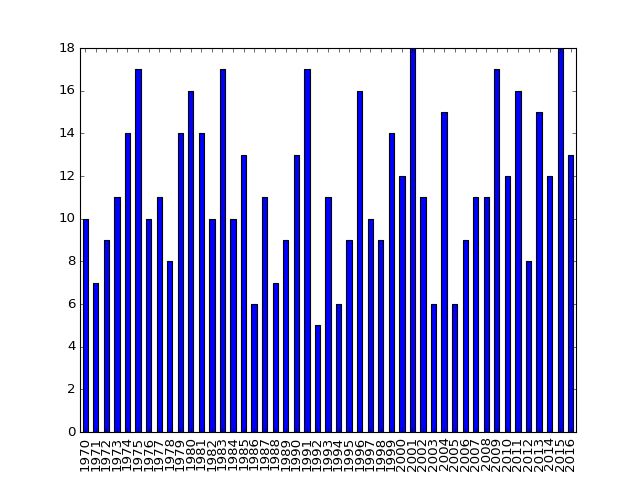

In [59]:
events_per_season_by_year['summer'].plot(kind='bar')